In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#path to train and test data
train_path = r'./dataset/'

In [3]:
#read treain and test data
train_data = pd.read_csv(train_path +'train.csv')

In [4]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [54]:
#check for missing values
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [56]:
#check for duplicated data
train_data.duplicated().sum()

0

In [5]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [30]:
#select numeric and categorical vars for easier preprocessing
numeric_vars = train_data[['battery_power','m_dep','clock_speed','pc','int_memory','mobile_wt',
                           'px_height','px_width','sc_h','talk_time','sc_w','ram']]

cat_vars = train_data[['blue','dual_sim','fc','four_g','n_cores','three_g','touch_screen','wifi']]
y = train_data['price_range']

In [31]:
numeric_vars.head()

,battery_power,m_dep,clock_speed,pc,int_memory,mobile_wt,px_height,px_width,sc_h,talk_time,sc_w,ram
0,842,0.6,2.2,2,7,188,20,756,9,19,7,2549
1,1021,0.7,0.5,6,53,136,905,1988,17,7,3,2631
2,563,0.9,0.5,6,41,145,1263,1716,11,9,2,2603
3,615,0.8,2.5,9,10,131,1216,1786,16,11,8,2769
4,1821,0.6,1.2,14,44,141,1208,1212,8,15,2,1411


In [32]:
cat_vars.head()

,blue,dual_sim,fc,four_g,n_cores,three_g,touch_screen,wifi
0,0,0,1,0,2,0,0,1
1,1,1,0,1,3,1,1,0
2,1,1,2,1,5,1,1,0
3,1,0,0,0,6,1,0,0
4,1,0,13,1,2,1,1,0


In [33]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

In [37]:
#instantiate standard scaler and scale numeric variables
s_scaler = StandardScaler()

scaled_num_vars = s_scaler.fit_transform(numeric_vars)
scaled_num_vars = pd.DataFrame(data = scaled_num_vars, columns= numeric_vars.columns)

In [38]:
scaled_num_vars.head()

,battery_power,m_dep,clock_speed,pc,int_memory,mobile_wt,px_height,px_width,sc_h,talk_time,sc_w,ram
0,-0.902597,0.340740,0.830779,-1.305750,-1.380644,1.349249,-1.408949,-1.146784,-0.784983,1.462493,0.283103,0.391703
1,-0.495139,0.687548,-1.253064,-0.645989,1.155024,-0.120059,0.585778,1.704465,1.114266,-0.734267,-0.635317,0.467317
2,-1.537686,1.381165,-1.253064,-0.645989,0.493546,0.134244,1.392684,1.074968,-0.310171,-0.368140,-0.864922,0.441498
3,-1.419319,1.034357,1.198517,-0.151168,-1.215274,-0.261339,1.286750,1.236971,0.876859,-0.002014,0.512708,0.594569
4,1.325906,0.340740,-0.395011,0.673534,0.658915,0.021220,1.268718,-0.091452,-1.022389,0.730240,-0.864922,-0.657666


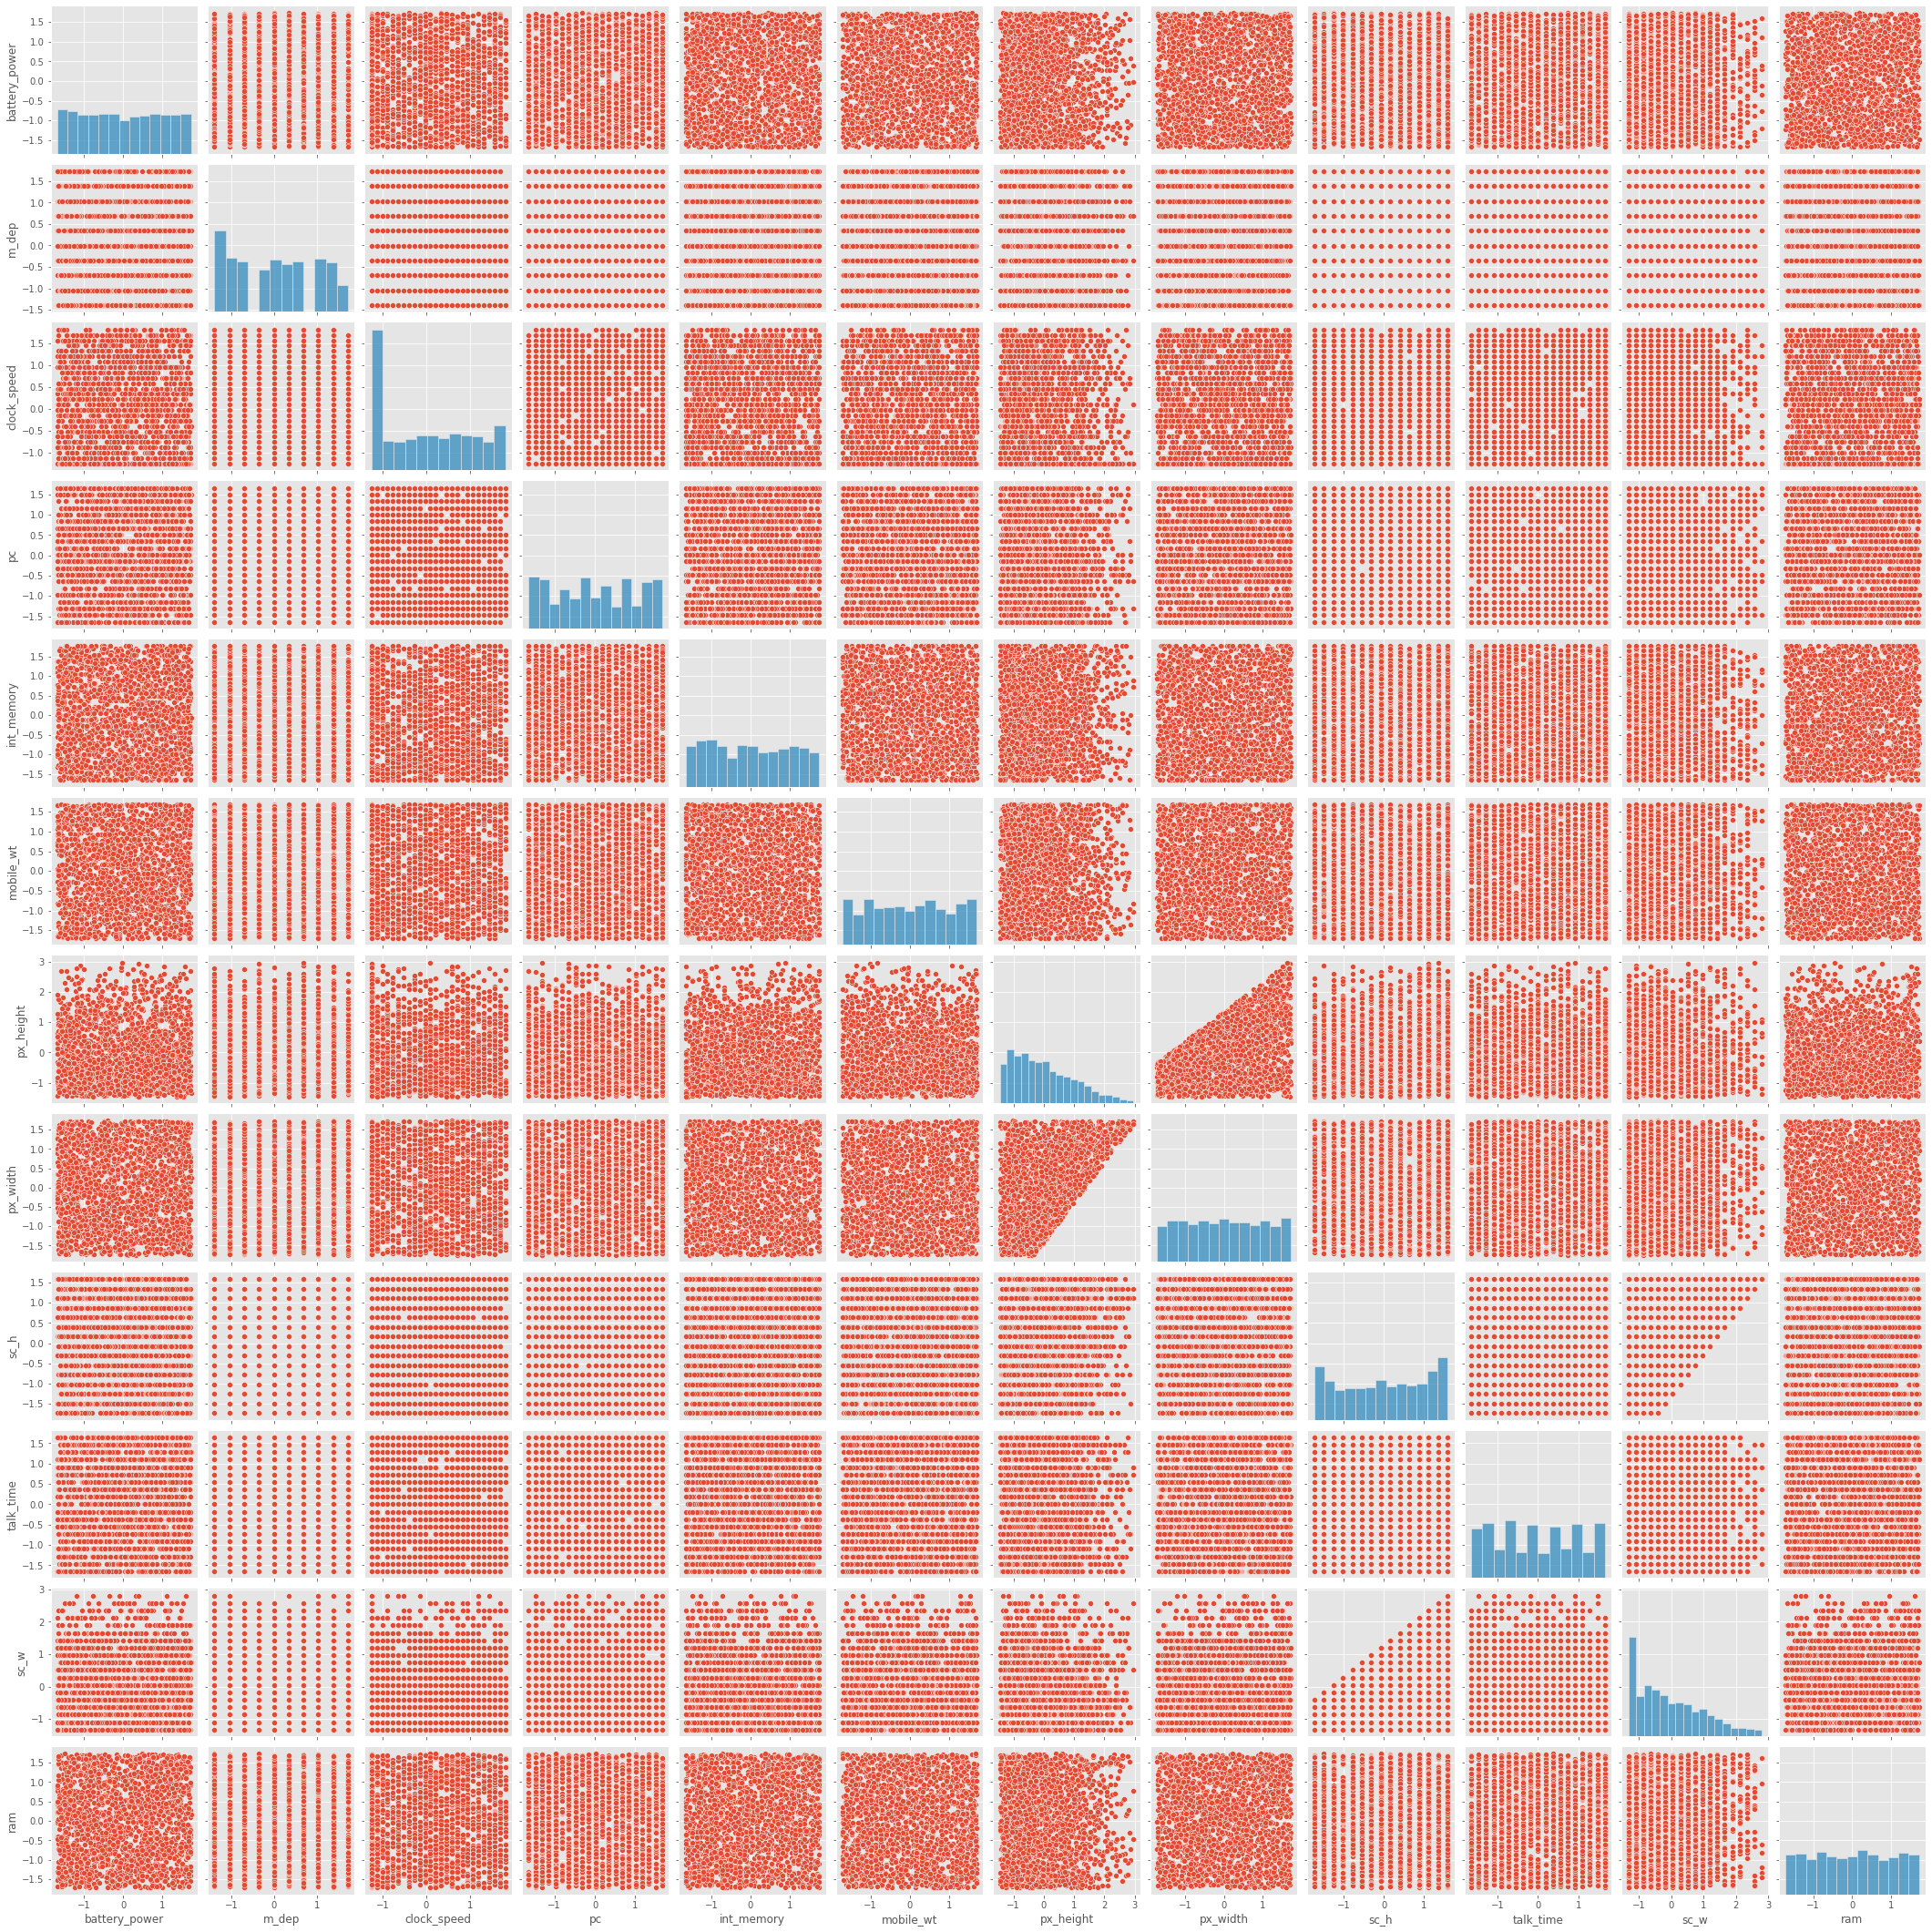

In [39]:
sns.pairplot(scaled_num_vars)

In [41]:
#merge numeric and categorical variables
x = pd.merge(left = cat_vars, right= scaled_num_vars, left_index= True, right_index=True)

In [42]:
x.head()

,blue,dual_sim,fc,four_g,n_cores,three_g,touch_screen,wifi,battery_power,m_dep,clock_speed,pc,int_memory,mobile_wt,px_height,px_width,sc_h,talk_time,sc_w,ram
0,0,0,1,0,2,0,0,1,-0.902597,0.340740,0.830779,-1.305750,-1.380644,1.349249,-1.408949,-1.146784,-0.784983,1.462493,0.283103,0.391703
1,1,1,0,1,3,1,1,0,-0.495139,0.687548,-1.253064,-0.645989,1.155024,-0.120059,0.585778,1.704465,1.114266,-0.734267,-0.635317,0.467317
2,1,1,2,1,5,1,1,0,-1.537686,1.381165,-1.253064,-0.645989,0.493546,0.134244,1.392684,1.074968,-0.310171,-0.368140,-0.864922,0.441498
3,1,0,0,0,6,1,0,0,-1.419319,1.034357,1.198517,-0.151168,-1.215274,-0.261339,1.286750,1.236971,0.876859,-0.002014,0.512708,0.594569
4,1,0,13,1,2,1,1,0,1.325906,0.340740,-0.395011,0.673534,0.658915,0.021220,1.268718,-0.091452,-1.022389,0.730240,-0.864922,-0.657666


In [44]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10, train_size=0.75)

In [46]:
#decison tree algorithm
from sklearn.tree import DecisionTreeClassifier

In [47]:
#instantaite and train decision tree algorithm
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
#make predictions
dtree_preds = dtree.predict(x_test)

In [53]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, dtree_preds))
print(f'\n Accuacy score : {accuracy_score(y_test, dtree_preds)}')

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       118
           1       0.79      0.84      0.81       126
           2       0.84      0.74      0.79       134
           3       0.87      0.91      0.89       122

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500


 Accuacy score : 0.848
